#Aula 09:

In [130]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris['class'] = iris.target

In [132]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [133]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [134]:
df_iris.rename(columns={'sepal length (cm)' : 'comprimento_sepala',
                        'sepal width (cm)' : 'largura_sepala',
                        'petal length (cm)' : 'comprimento_petala',
                        'petal width' : 'largura_petala'}, inplace = True)

In [135]:
x = df_iris.drop(columns=['class'])
y = df_iris['class']

In [136]:
x.head()

,comprimento_sepala,largura_sepala,comprimento_petala,petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<function matplotlib.pyplot.show(close=None, block=None)>

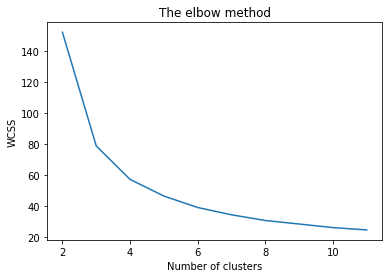

In [137]:
wcss = []

for i in range(2, 12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 5, random_state = 13)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [138]:
kmeans = KMeans (n_clusters = 3, #número de clusters que eu quero dividir a amostra
                 random_state = 42)
kmeans = kmeans.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [139]:
kmeans #modelo

KMeans(n_clusters=3, random_state=42)

In [140]:
labels = kmeans.predict(x)#prevê e cria labels, dá um valor para cada cluster

In [141]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [142]:
centroids = kmeans.cluster_centers_ #cálculo das centróides

In [143]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [144]:
df_iris['cluster'] = labels

In [145]:
df_iris[['class', 'cluster']]

,class,cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,2
146,2,0
147,2,2
148,2,2


<AxesSubplot:xlabel='comprimento_sepala', ylabel='cluster'>

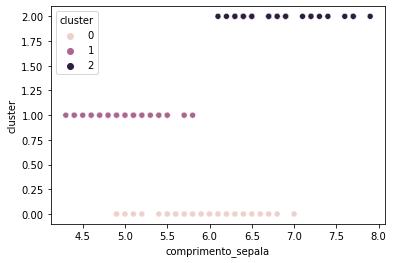

In [146]:
sns.scatterplot(data = df_iris,
                x = 'comprimento_sepala',
                y = 'cluster',
                hue = 'cluster')

<AxesSubplot:xlabel='comprimento_sepala', ylabel='class'>

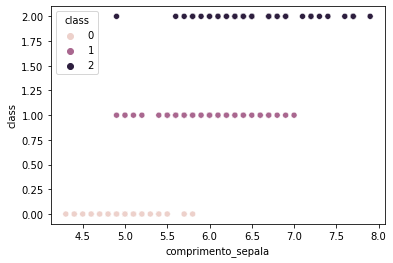

In [147]:
sns.scatterplot(data = df_iris,
                x = 'comprimento_sepala',
                y = 'class',
                hue = 'class')